In [1]:
# 04/05/2022 - Trying out Gaussian MGE on J0037 by modifying fit_ngc4342 from mge_fit_example.py
# from mge_fit examples

################################################################

# import libraries
import numpy as np
np.set_printoptions(threshold=10000)
import matplotlib.pyplot as plt
from astropy.io import fits
from os import path

import mgefit
from mgefit.find_galaxy import find_galaxy
from mgefit.mge_fit_1d import mge_fit_1d
from mgefit.sectors_photometry import sectors_photometry
from mgefit.mge_fit_sectors import mge_fit_sectors
from mgefit.mge_print_contours import mge_print_contours
from mgefit.mge_fit_sectors_twist import mge_fit_sectors_twist
from mgefit.sectors_photometry_twist import sectors_photometry_twist
from mgefit.mge_print_contours_twist import mge_print_contours_twist

plt.rcParams["figure.figsize"] = (8, 6)

################################################################

In [2]:
file_dir = '/data/raw_data/KECK_KCWI_SLACS_kinematics_shawn/CF_mosaics/SDSSJ0037-0942'
obj_name = '/SDSSJ0037-0942'

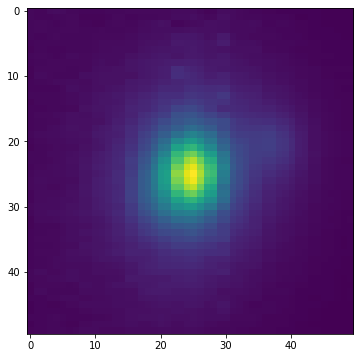

In [3]:


file = file_dir + "/KCWI_J0037_icubes_mosaic_0.1457_2Dintegrated.fits"

hdu = fits.open(file)
img = hdu[0].data
header = hdu[0].header

# crop the image to ~ 50 pixels
central_pix = np.unravel_index(np.argmax(img, axis=None), img.shape)
central_pix_x = central_pix[1]
central_pix_y = central_pix[0]


crop_width = 50
half_width = int(crop_width/2)
img = img[central_pix_y - half_width:central_pix_y + half_width, central_pix_x - half_width:central_pix_x + half_width]

plt.clf()
plt.imshow(img)

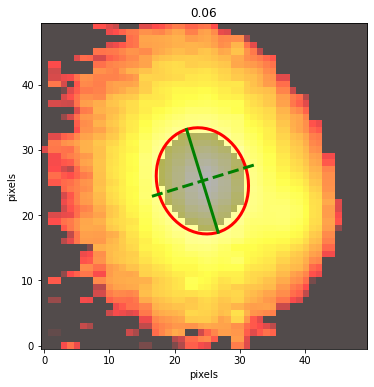

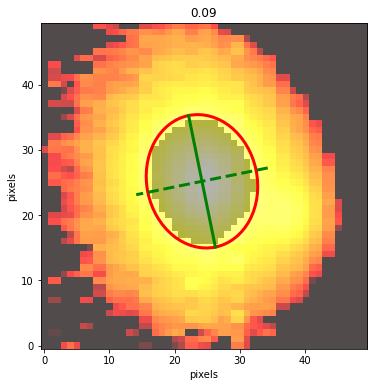

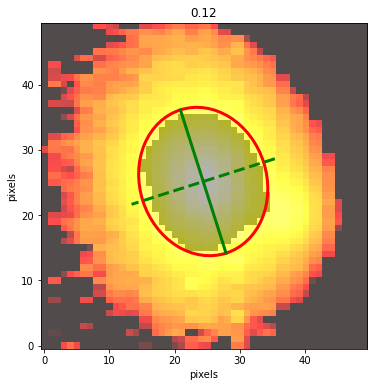

<Figure size 576x432 with 0 Axes>

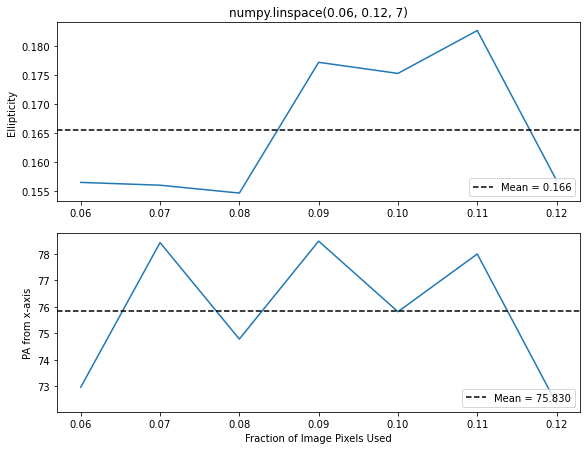

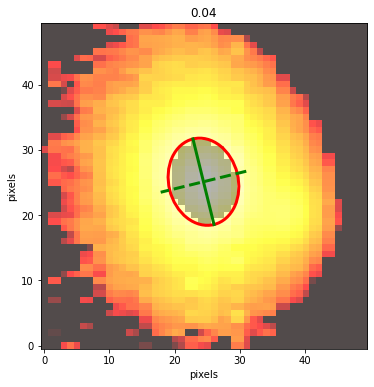

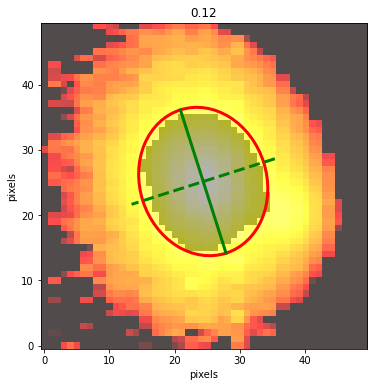

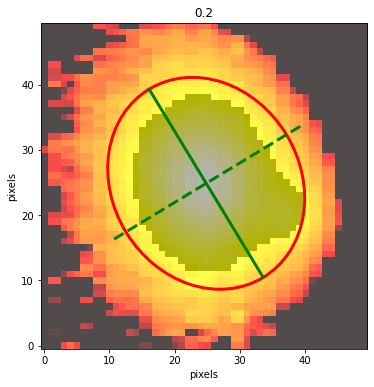

<Figure size 576x432 with 0 Axes>

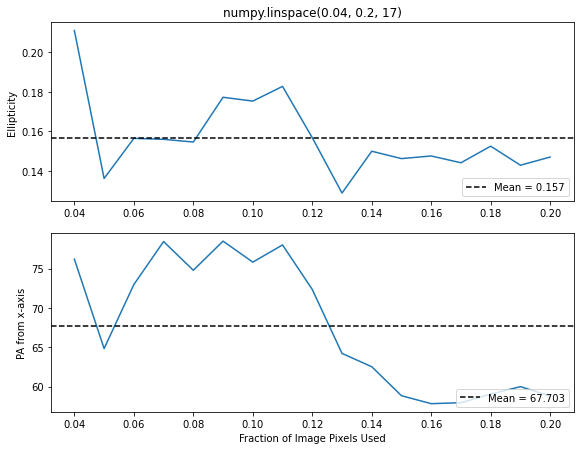

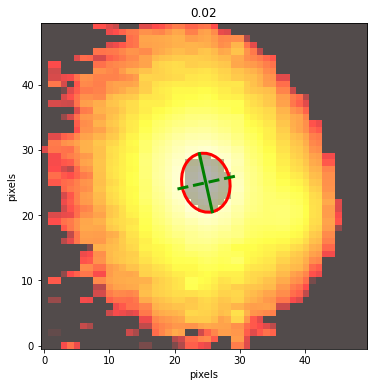

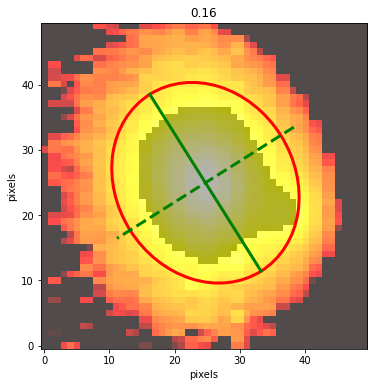

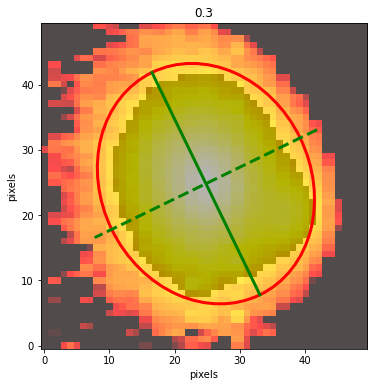

<Figure size 576x432 with 0 Axes>

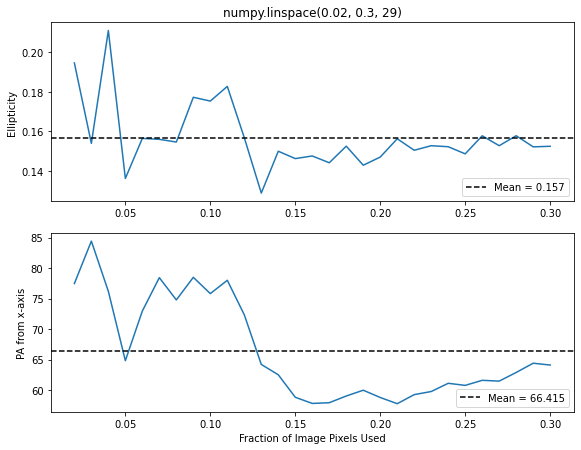

In [4]:
############### These values need to change... where do I get them?

# sky and psf?
# autfwhm from one of the exposures. 1.105087 pix
#skylev = 0.55   # counts/pixel
#img -= skylev   # subtract sky
scale = 0.147  # arcsec/pixel
minlevel = 1  # counts/pixel
ngauss = 12

# Here we use an accurate four gaussians MGE PSF for
# the HST/WFPC2/F814W filter, taken from Table 3 of
# Cappellari et al. (2002, ApJ, 578, 787)

#sigmapsf = [0.494, 1.44, 4.71, 13.4]      # In PC1 pixels
#normpsf = [0.294, 0.559, 0.0813, 0.0657]  # total(normpsf)=1

##############################################################3

# Here we use FIND_GALAXY directly inside the procedure. Usually you may want
# to experiment with different values of the FRACTION keyword, before adopting
# given values of Eps, Ang, Xc, Yc.

def test_fractions (lower, upper, steps):

    fractions = np.linspace(lower, upper, steps)
    
    eps_list = []
    theta_list = []
    #cen_y_list = [] # don't need these, already centered it
    #cen_x_list = []
        
    for frac in fractions:
        #print(f'Calculating fraction {frac}')
        frac = np.around(frac, 2)
        mid = np.around((upper+lower)/2, 2)
        plt.clf()
        if (frac==lower) | (frac==mid) | (frac==upper):
            plot = 1
        else:
            plot = 0
        f = find_galaxy(img, fraction=frac, plot=plot, quiet=True)
        eps = f.eps
        theta = f.theta
        #cen_y = f.ypeak
        #cen_x = f.xpeak
        # assign to lists
        eps_list.append(eps)
        theta_list.append(theta)
        #cen_y_list.append(cen_y)
        #cen_x_list.append(cen_x)
        if plot == 1:
            plt.title(f'{frac}')
            plt.pause(1)  # Allow plot to appear on the screen

    eps_mean = np.mean(eps_list)
    theta_mean = np.mean(theta_list)
    #cen_y_med = np.median(cen_y_list)
    #cen_x_med = np.median(cen_x_list)

    # plot each
    plt.clf()    
    fig, axs = plt.subplots(2, figsize=(8, 6))
    fig.tight_layout()
    axs[0].set_title(f'numpy.linspace{lower, upper, steps}')
    axs[0].plot(fractions, eps_list)
    axs[0].axhline(eps_mean, color='k', linestyle='--', label=f'Mean = {"{:.3f}".format(eps_mean)}')
    axs[0].set_ylabel('Ellipticity')
    axs[0].legend(loc='lower right')
    axs[1].plot(fractions, theta_list)
    axs[1].axhline(theta_mean, color='k', linestyle='--', label=f'Mean = {"{:.3f}".format(theta_mean)}')
    axs[1].set_ylabel('PA from x-axis')
    axs[1].legend(loc='lower right')
    #axs[2].plot(fractions, cen_y_list)
    #axs[2].axhline(cen_y_med, color='k', linestyle='--', label=f'Median = {"{:.3f}".format(cen_y_med)}')
    #axs[2].set_ylabel('Center y')
    #axs[2].legend(loc='lower right')
    #axs[3].plot(fractions, cen_x_list)
    #axs[3].axhline(cen_x_med, color='k', linestyle='--', label=f'Median = {"{:.3f}".format(cen_x_med)}')
    #axs[3].set_ylabel('Center x')
    axs[1].set_xlabel('Fraction of Image Pixels Used')
    #axs[3].legend(loc='lower right')
    plt.pause(1)
    
test_fractions(0.06, 0.12, 7)
test_fractions(0.04, 0.20, 17)
test_fractions(0.02, 0.30, 29)

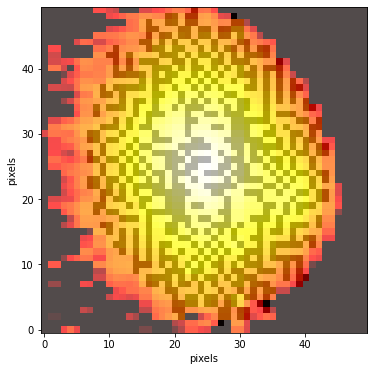

psf as 0.6
Iteration:1  chi2: 2.651  Nonzero: 5/12
Iteration:11  chi2: 2.417  Nonzero: 5/12
Nonzero Gaussians: 5/12
Eliminating not useful Gaussians...
ngauss: 4          chi2: 2.416
Starting nonlinear fit...
Iteration:1  chi2: 2.416  Nonzero: 4/4
Nonzero Gaussians: 4/4
Eliminating not useful Gaussians...
All Gaussians are needed!
############################################
 Computation time: 0.33 seconds
  Total Iterations:  17
 Nonzero Gaussians:  4
  Unused Gaussians:  8
 Sectors used in the fit:  19
 Total number of points fitted:  287
 Chi2: 2.414 
 STDEV: 0.09132 
 MEANABSDEV: 0.06993 
############################################
  Total_Counts  sigma_Pixels      q_obs
############################################
  4.738526e+02      1.40821     0.855279
  4.164779e+03      3.30235     0.801972
  1.580713e+03      6.98729     0.908586
  1.238454e+04      8.85540     0.804168
++++++++++++++++++++++++++++++++++++++++++++


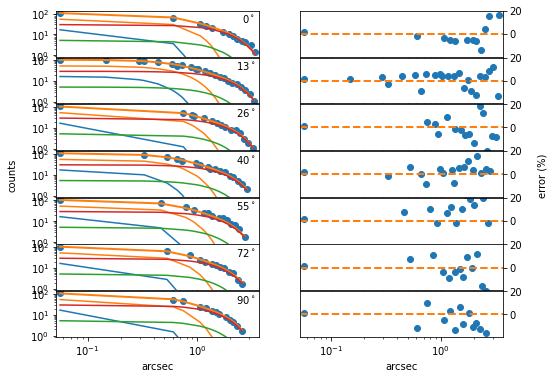

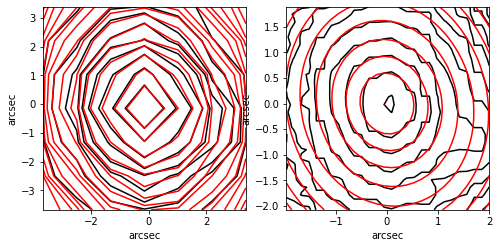

psf as 0.7
Iteration:1  chi2: 2.694  Nonzero: 4/12
Nonzero Gaussians: 6/12
Eliminating not useful Gaussians...
ngauss: 5          chi2: 2.422
ngauss: 4          chi2: 2.422
Starting nonlinear fit...
Iteration:1  chi2: 2.422  Nonzero: 4/4
Nonzero Gaussians: 4/4
Eliminating not useful Gaussians...
All Gaussians are needed!
############################################
 Computation time: 0.23 seconds
  Total Iterations:  9
 Nonzero Gaussians:  4
  Unused Gaussians:  8
 Sectors used in the fit:  19
 Total number of points fitted:  287
 Chi2: 2.42 
 STDEV: 0.09144 
 MEANABSDEV: 0.07021 
############################################
  Total_Counts  sigma_Pixels      q_obs
############################################
  6.157306e+02      1.51653     0.835599
  4.039321e+03      3.24126     0.794154
  3.044184e+03      7.46758     0.877044
  1.091389e+04      8.93802     0.796543
++++++++++++++++++++++++++++++++++++++++++++


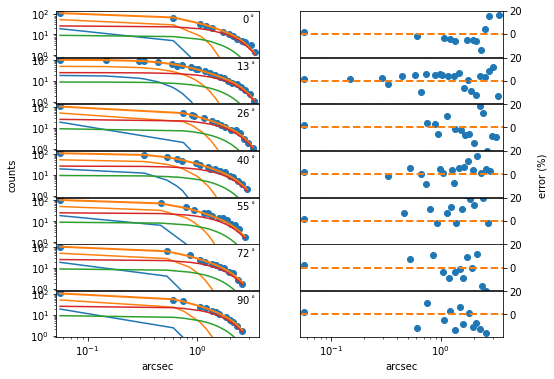

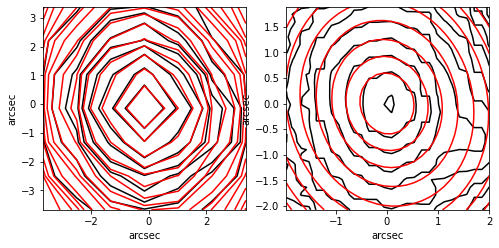

psf as 0.8
Iteration:1  chi2: 2.747  Nonzero: 5/12
Iteration:11  chi2: 2.440  Nonzero: 4/12
Iteration:21  chi2: 2.436  Nonzero: 4/12
Nonzero Gaussians: 4/12
Eliminating not useful Gaussians...
Starting nonlinear fit...
Iteration:1  chi2: 2.428  Nonzero: 4/4
Nonzero Gaussians: 4/4
Eliminating not useful Gaussians...
All Gaussians are needed!
############################################
 Computation time: 0.41 seconds
  Total Iterations:  25
 Nonzero Gaussians:  4
  Unused Gaussians:  8
 Sectors used in the fit:  19
 Total number of points fitted:  287
 Chi2: 2.427 
 STDEV: 0.09157 
 MEANABSDEV: 0.07049 
############################################
  Total_Counts  sigma_Pixels      q_obs
############################################
  8.050909e+02      1.62485     0.816537
  3.858726e+03      3.17038     0.786227
  6.682631e+03      7.92397     0.846848
  7.276328e+03      9.19698     0.780134
++++++++++++++++++++++++++++++++++++++++++++


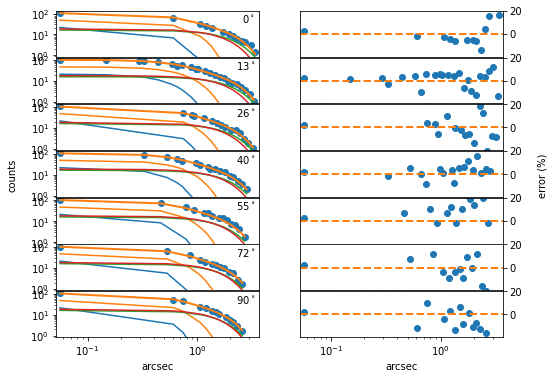

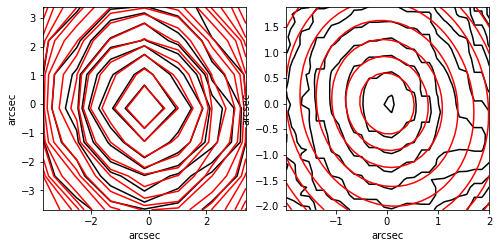

psf as 0.8
Iteration:1  chi2: 2.806  Nonzero: 5/12
Iteration:11  chi2: 2.440  Nonzero: 4/12
Nonzero Gaussians: 4/12
Eliminating not useful Gaussians...
Starting nonlinear fit...
Iteration:1  chi2: 2.439  Nonzero: 4/4
Nonzero Gaussians: 4/4
Eliminating not useful Gaussians...
All Gaussians are needed!
############################################
 Computation time: 0.28 seconds
  Total Iterations:  13
 Nonzero Gaussians:  4
  Unused Gaussians:  8
 Sectors used in the fit:  19
 Total number of points fitted:  287
 Chi2: 2.433 
 STDEV: 0.09169 
 MEANABSDEV: 0.07076 
############################################
  Total_Counts  sigma_Pixels      q_obs
############################################
  1.083052e+03      1.73318     0.803664
  3.597020e+03      3.10296     0.780781
  1.117694e+04      8.22796     0.826547
  2.774390e+03      9.88958     0.741831
++++++++++++++++++++++++++++++++++++++++++++


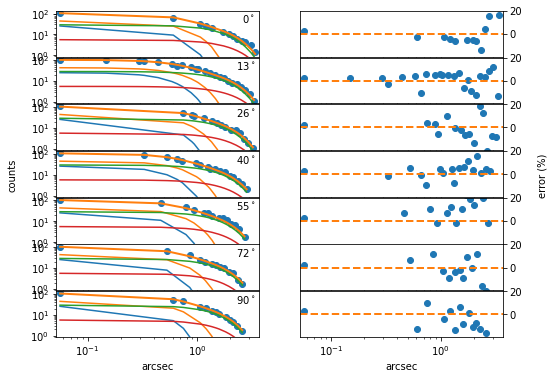

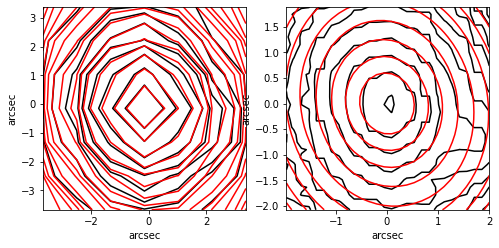

psf as 0.8
Iteration:1  chi2: 2.874  Nonzero: 4/12
Iteration:11  chi2: 2.447  Nonzero: 5/12
Iteration:21  chi2: 2.441  Nonzero: 5/12
Nonzero Gaussians: 5/12
Eliminating not useful Gaussians...
ngauss: 4          chi2: 2.446
Starting nonlinear fit...
Iteration:1  chi2: 2.446  Nonzero: 4/4
Iteration:11  chi2: 2.440  Nonzero: 4/4
Nonzero Gaussians: 4/4
Eliminating not useful Gaussians...
All Gaussians are needed!
############################################
 Computation time: 0.45 seconds
  Total Iterations:  24
 Nonzero Gaussians:  4
  Unused Gaussians:  8
 Sectors used in the fit:  19
 Total number of points fitted:  287
 Chi2: 2.44 
 STDEV: 0.0918 
 MEANABSDEV: 0.07103 
############################################
  Total_Counts  sigma_Pixels      q_obs
############################################
  1.458587e+03      1.84150     0.814745
  3.170857e+03      3.00081     0.814745
  5.752438e+03      7.69147     0.850265
  8.254352e+03      9.05856     0.779225
+++++++++++++++++++++++++++

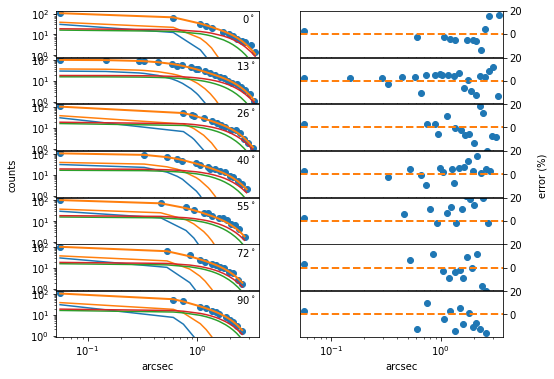

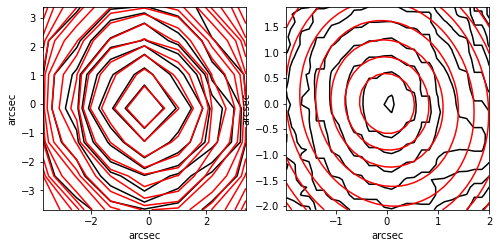

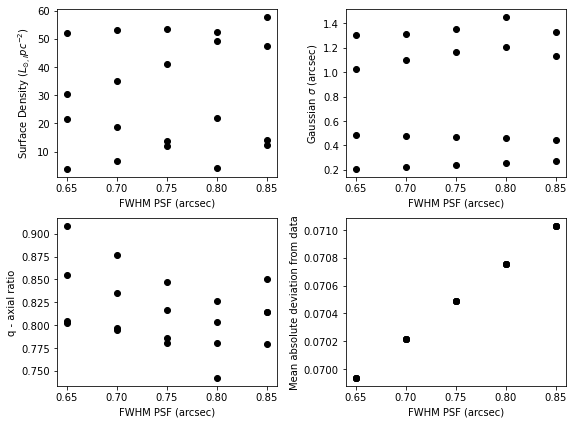

In [5]:
# check differences for different psf

file_dir = '/data/raw_data/KECK_KCWI_SLACS_kinematics_shawn/CF_mosaics/SDSSJ0037-0942'

file = file_dir + "/KCWI_J0037_icubes_mosaic_0.1457_2Dintegrated.fits"

hdu = fits.open(file)
img = hdu[0].data
header = hdu[0].header

# crop the image to ~ 50 pixels
central_pix = np.unravel_index(np.argmax(img, axis=None), img.shape)
central_pix_x = central_pix[1]
central_pix_y = central_pix[0]


crop_width = 50
half_width = int(crop_width/2)
img = img[central_pix_y - half_width:central_pix_y + half_width, central_pix_x - half_width:central_pix_x + half_width]

plt.clf()
plt.imshow(img)

# sky and psf?
# autfwhm from one of the exposures. 1.105087 pix
#skylev = 0.55   # counts/pixel
#img -= skylev   # subtract sky
scale = 0.147  # arcsec/pixel
minlevel = 1  # counts/pixel
# exposure time
exp_time = 1.5 * 3600 # seconds
ngauss = 12

# Here we use an accurate four gaussians MGE PSF for
# the HST/WFPC2/F814W filter, taken from Table 3 of
# Cappellari et al. (2002, ApJ, 578, 787)

#sigmapsf = [0.494, 1.44, 4.71, 13.4]      # In PC1 pixels
#normpsf = [0.294, 0.559, 0.0813, 0.0657]  # total(normpsf)=1

# Keck median seeing is 0.5 arcsec
seeing_fwhm = np.linspace(0.65, 0.85, 5) # arcsec
sigma_psf = seeing_fwhm / scale / 2.355 # pixels, 2.355 is fwhm/sigma
#print(sigma_psf)

##############################################################3

# Here we use FIND_GALAXY directly inside the procedure. Usually you may want
# to experiment with different values of the FRACTION keyword, before adopting
# given values of Eps, Ang, Xc, Yc.

lower, upper, steps = (0.06, 0.12, 7)

fractions = np.linspace(lower, upper, steps)
    
eps_list = []
theta_list = []
#cen_y_list = [] # don't need these, already centered it
#cen_x_list = []

for frac in fractions:
    #print(f'Calculating fraction {frac}')
    frac = np.around(frac, 2)
    mid = np.around((upper+lower)/2, 2)
    plt.clf()
    if (frac==lower) | (frac==mid) | (frac==upper):
        plot = 1
    else:
        plot = 0
    #plt.clf()
    f = find_galaxy(img, fraction=frac, plot=0, quiet=True)
    eps = f.eps
    theta = f.theta
    #cen_y = f.ypeak
    #cen_x = f.xpeak
    # assign to lists
    eps_list.append(eps)
    theta_list.append(theta)
    #cen_y_list.append(cen_y)
    #cen_x_list.append(cen_x)
    #if plot == 1:
    #    plt.title(f'{frac}')
    #    plt.pause(1)  # Allow plot to appear on the screen

eps_mean = np.mean(eps_list)
theta_mean = np.mean(theta_list)
#cen_y_med = np.median(cen_y_list)
#cen_x_med = np.median(cen_x_list)

# Perform galaxy photometry
plt.clf()
s = sectors_photometry(img, eps_mean, theta_mean, f.xpeak, f.ypeak,
                       minlevel=minlevel, plot=1)
plt.pause(1)  # Allow plot to appear on the screen

# Do the actual MGE fit
# *********************** IMPORTANT ***********************************
# For the final publication-quality MGE fit one should include the line
# "from mge_fit_sectors_regularized import mge_fit_sectors_regularized"
# at the top of this file, rename mge_fit_sectors() into
# mge_fit_sectors_regularized() and re-run the procedure.
# See the documentation of mge_fit_sectors_regularized for details.
# *********************************************************************

# set up lists for the outputs from mge_fit_sectors to show the differences with different psf
surf_dens_list = []
sigma_list = []
q_list = []
absdev_list = []


for sigmapsf in sigma_psf:
    
    print('psf as ' + str(np.around(sigmapsf*scale*2.355, 1))) 
    
    plt.clf()
    m = mge_fit_sectors(s.radius, s.angle, s.counts, eps_mean,
                        ngauss=ngauss, sigmapsf=sigmapsf, #normpsf=normpsf,
                        scale=scale, plot=1, bulge_disk=0, linear=0)
    
    # take the outputs
    total_counts = m.sol[0]
    sigma_pix = m.sol[1]
    q = m.sol[2]
    absdev = m.absdev
    
    # calculate peak surface brightness of each gaussian
    peak_surf_br = total_counts/(2*np.pi*q*sigma_pix**2)
    # convert to johnson i band
    # Here 20.840 is the photometric zeropint, 0.1 is a correction for infinite aperture to be applied 
    # for surface brightness measurements, and AI is the extinction in the I-band
    # dust extinction ~ 0.05 from https://irsa.ipac.caltech.edu/workspace/TMP_lFD64I_6198/DUST/SDSSJ0037-0942.v0002/extinction.html
    AI = 0.05
    iband_surf_br = 20.840 + 0.1 + 5 * np.log10(scale) + 2.5 * np.log10(exp_time) - 2.5 * np.log10(peak_surf_br) - AI
    # convert to surface density (L_sol_I pc−2)
    M_sol_I = 4.08
    surf_density = (64800/np.pi)**2 * 10**( 0.4 * (M_sol_I - iband_surf_br))
    # convert sigma from pixels to arcsec
    sigma = sigma_pix * scale
        
    # update lists
    q_list.append(q)
    absdev_list.append(absdev)
    surf_dens_list.append(surf_density)
    sigma_list.append(sigma)
    
    plt.pause(1)  # Allow plot to appear on the screen

    # Show contour plots of the results
    plt.clf()
    plt.subplot(121)
    mge_print_contours(img.clip(minlevel), theta_mean, f.xpeak, f.ypeak, m.sol, scale=scale,
                       binning=7, sigmapsf=sigmapsf, #normpsf=normpsf, 
                       magrange=9)

    # Extract the central part of the image to plot at high resolution.
    # The MGE is centered to fractional pixel accuracy to ease visual comparson.

    n = int(np.around(2/scale))
    img_cen = img[f.xpeak-n:f.xpeak+n, f.ypeak-n:f.ypeak+n]
    xc, yc = n - f.xpeak + f.xmed, n - f.ypeak + f.ymed
    plt.subplot(122)
    mge_print_contours(img_cen, theta_mean, xc, yc, m.sol,
                       sigmapsf=sigmapsf, #normpsf=normpsf, 
                       scale=scale)
    plt.pause(1)  # Allow plot to appear on the screen
    
# plot the differences
fig, axs = plt.subplots(2, 2)

for i in range(len(surf_dens_list)):
    for j in range(len(surf_dens_list[i])):
        # plot each axisif (not bulge_disk) and (qbounds.size == 2):
        axs[0,0].plot(seeing_fwhm[i], surf_dens_list[i][j], 
                      linestyle='-', marker='o', color='k')
        axs[0,1].plot(seeing_fwhm[i], sigma_list[i][j], 
                      linestyle='-', marker='o', color='k')
        axs[1,0].plot(seeing_fwhm[i], q_list[i][j], 
                      linestyle='-', marker='o', color='k')
        axs[1,1].plot(seeing_fwhm[i], absdev_list[i], 
                      linestyle='-', marker='o', color='k')
        # give x, y labels
        axs[0,0].set_xlabel('FWHM PSF (arcsec)')
        axs[0,1].set_xlabel('FWHM PSF (arcsec)')
        axs[1,0].set_xlabel('FWHM PSF (arcsec)')
        axs[1,1].set_xlabel('FWHM PSF (arcsec)')
        axs[0,0].set_ylabel(r'Surface Density ($L_{\odot,I} pc^{-2}$)')
        axs[0,1].set_ylabel(r'Gaussian $\sigma$ (arcsec)') 
        axs[1,0].set_ylabel('q - axial ratio')
        axs[1,1].set_ylabel('Mean absolute deviation from data')
        
fig.tight_layout()

___________________

# Try out JAM model step with the model that has psf 0.75



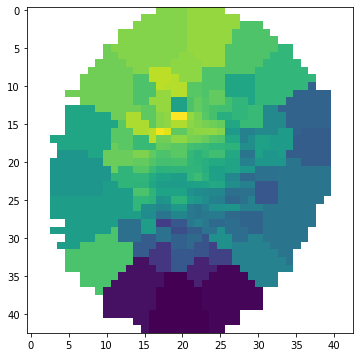

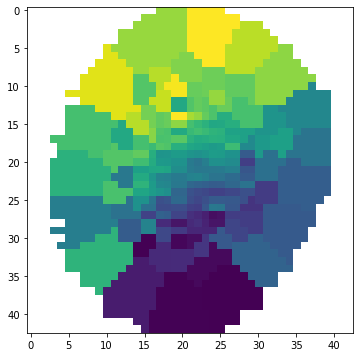

In [6]:
V = np.genfromtxt(file_dir + obj_name + '_V_2d.txt', delimiter=',')
dV = np.genfromtxt(file_dir + obj_name + '_dV_2d.txt', delimiter=',')
VD = np.genfromtxt(file_dir + obj_name + '_VD_2d.txt', delimiter=',')
dVD = np.genfromtxt(file_dir + obj_name + '_dVD_2d.txt', delimiter=',')
Vrms = np.sqrt(V**2 + VD**2)

plt.imshow(Vrms)
plt.figure()
plt.imshow(V)

jam_axi_proj_sph_zz (analytic_los=False) elapsed time sec: 2.61
inc=60.0; beta[0]=0.20; kappa=1.00; M/L=273.; BH=2.7e+10; chi2/DOF=14.8
Total mass MGE (MSun): 8.704e+11
[-3.15747686 -3.01051607 -2.86355529 -2.7165945  -2.56963372 -2.42267293
 -2.27571215 -2.12875136 -1.98179058 -1.83482979 -1.68786901 -1.54090822
 -1.39394744 -1.24698665 -1.10002587 -0.95306508 -0.8061043  -0.65914352
 -0.51218273 -0.36522195 -0.21826116 -0.07130038  0.07566041  0.22262119
  0.36958198  0.51654276  0.66350355  0.81046433  0.95742512  1.1043859
  1.25134669  1.39830747  1.54526825  1.69222904  1.83918982  1.98615061
  2.13311139  2.28007218  2.42703296  2.57399375  2.72095453  2.86791532
  3.0148761  -3.15747686 -3.01051607 -2.86355529 -2.7165945  -2.56963372
 -2.42267293 -2.27571215 -2.12875136 -1.98179058 -1.83482979 -1.68786901
 -1.54090822 -1.39394744 -1.24698665 -1.10002587 -0.95306508 -0.8061043
 -0.65914352 -0.51218273 -0.36522195 -0.21826116 -0.07130038  0.07566041
  0.22262119  0.36958198  0.51

/local/shawnknabel/anaconda3/envs/astroconda/lib/python3.7/site-packages/plotbin/sauron_colormap.py:105: UserWarning: Trying to register the cmap 'sauron' which already exists.
  plt.register_cmap(cmap=sauron)
/local/shawnknabel/anaconda3/envs/astroconda/lib/python3.7/site-packages/plotbin/sauron_colormap.py:106: UserWarning: Trying to register the cmap 'sauron_r' which already exists.
  plt.register_cmap(cmap=sauron_r)


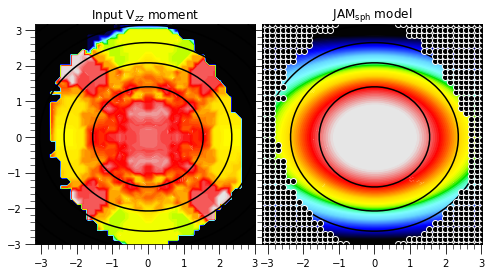

jam_axi_proj_sph_z (analytic_los=False) elapsed time sec: 1.65
inc=60.0; beta[0]=0.20; kappa=-2.37; M/L=1.00; BH=1.0e+08; chi2/DOF=465.
Total mass MGE (MSun): 8.432e+11
[-3.15747686 -3.01051607 -2.86355529 -2.7165945  -2.56963372 -2.42267293
 -2.27571215 -2.12875136 -1.98179058 -1.83482979 -1.68786901 -1.54090822
 -1.39394744 -1.24698665 -1.10002587 -0.95306508 -0.8061043  -0.65914352
 -0.51218273 -0.36522195 -0.21826116 -0.07130038  0.07566041  0.22262119
  0.36958198  0.51654276  0.66350355  0.81046433  0.95742512  1.1043859
  1.25134669  1.39830747  1.54526825  1.69222904  1.83918982  1.98615061
  2.13311139  2.28007218  2.42703296  2.57399375  2.72095453  2.86791532
  3.0148761  -3.15747686 -3.01051607 -2.86355529 -2.7165945  -2.56963372
 -2.42267293 -2.27571215 -2.12875136 -1.98179058 -1.83482979 -1.68786901
 -1.54090822 -1.39394744 -1.24698665 -1.10002587 -0.95306508 -0.8061043
 -0.65914352 -0.51218273 -0.36522195 -0.21826116 -0.07130038  0.07566041
  0.22262119  0.36958198  0.51

/local/shawnknabel/anaconda3/envs/astroconda/lib/python3.7/site-packages/plotbin/sauron_colormap.py:105: UserWarning: Trying to register the cmap 'sauron' which already exists.
  plt.register_cmap(cmap=sauron)
/local/shawnknabel/anaconda3/envs/astroconda/lib/python3.7/site-packages/plotbin/sauron_colormap.py:106: UserWarning: Trying to register the cmap 'sauron_r' which already exists.
  plt.register_cmap(cmap=sauron_r)


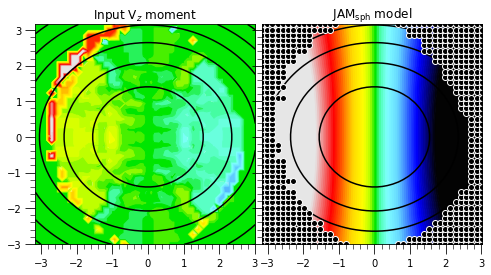

<Figure size 576x432 with 0 Axes>

In [7]:
"""
    Copyright (C) 2019-2021, Michele Cappellari

    E-mail: michele.cappellari_at_physics.ox.ac.uk

    Updated versions of the software are available from my web page
    http://purl.org/cappellari/software

CHANGELOG
---------

V1.1.0: MC, Oxford, 16 July 2020
    - Compute both Vrms and LOS velocity.
V1.0.1: MC, Oxford, 21 April 2020
    - Made a separate file
V1.0.0: Michele Cappellari, Oxford, 08 November 2019
    - Written and tested

"""
import numpy as np
import matplotlib.pyplot as plt

from jampy.jam_axi_proj import jam_axi_proj
from jampy.jam_axi_proj import rotate_points
from plotbin.plot_velfield import plot_velfield

##############################################################################

#np.random.seed(123)
#xbin, ybin = np.random.uniform(low=[-55, -40], high=[55, 40], size=[1000, 2]).T

'''
What do I do for inclination?
'''
inc = 60.                                                # Assumed galaxy inclination

#r = np.sqrt(xbin**2 + (ybin/np.cos(np.radians(inc)))**2) # Radius in the plane of the disk
#a = 40                                                   # Scale length in arcsec
#vr = 2000*np.sqrt(r)/(r + a)                             # Assumed velocity profile (v_c of Hernquist 1990)
#vel = vr * np.sin(np.radians(inc))*xbin/r                # Projected velocity field
#sig = 8700/(r + a)                                       # Assumed velocity dispersion profile
#rms = np.sqrt(vel**2 + sig**2)                           # Vrms field in km/s

# Until here I computed some fake input kinematics to fit with JAM.
# Ina real application, instead of the above lines one will read the
# measured stellar kinematics, e.g. from integral-field spectroscopy

'''
Open kinematics maps
'''
V = np.genfromtxt(file_dir + obj_name + '_V_2d.txt', delimiter=',')
dV = np.genfromtxt(file_dir + obj_name + '_dV_2d.txt', delimiter=',')
VD = np.genfromtxt(file_dir + obj_name + '_VD_2d.txt', delimiter=',')
dVD = np.genfromtxt(file_dir + obj_name + '_dVD_2d.txt', delimiter=',')
# compute rms velocity
Vrms = np.sqrt(V**2 + VD**2)
dVrms = np.sqrt((dV*V)**2 + (dVD*VD)**2)/Vrms

'''
x and y bins (pixels)
'''
# write the grid of xbins and ybins with (0,0) at the center and the x-axis corresponding to major axis
# set x and y bins so that center is (0, 0)
size = V.shape[0]

xbin_arcsec = np.linspace(-np.floor(size/2), np.floor(size/2), size) * scale
ybin_arcsec = np.linspace(-np.floor(size/2), np.floor(size/2), size) * scale

# set PA from mean photometry fitting
PA = np.radians(theta_mean)


# set new arrays with the rotated coordinates
xbin_rot = np.zeros(size)
ybin_rot = np.zeros(size)
    
# rotate the coordinates and save to array
for i in range(len(xbin_arcsec)):
    for j in range(len(ybin_arcsec)):
        x_new, y_new = rotate_points(xbin_arcsec[i], ybin_arcsec[j], PA)
        xbin_rot[i] = x_new
        ybin_rot[j] = y_new
        
xbin, ybin = np.meshgrid(xbin_rot, ybin_rot)

'''
flatten data and bins
'''
V = V.flatten()
dV = dV.flatten()
VD = VD.flatten()
dVD = dVD.flatten()
Vrms = Vrms.flatten()
dVrms = dVrms.flatten()
xbin = xbin.flatten()
ybin = ybin.flatten()
        
'''
surface density
'''
# take the surface density, etc from mge
surf = surf_dens_list[2] #np.array([39483., 37158., 30646., 17759., 5955.1, 1203.5, 174.36, 21.105, 2.3599, 0.25493])
sigma = sigma_list[2] #np.array([0.153, 0.515, 1.58, 4.22, 10, 22.4, 48.8, 105, 227, 525])
qObs = q_list[2] #np.full_like(sigma, 0.57)

from astropy.cosmology import Planck18 as cosmo  # Planck 2018
# redshift, convert to angular diameter dist in Mpc
z = 0.195
distance = cosmo.angular_diameter_distance(z).value
mbh = 1e8 # Black hole mass in solar masses
beta = np.full_like(surf, 0.2)

# Below I assume mass follows light, but in a real application one
# will generally include a dark halo in surf_pot, sigma_pot, qobs_pot.
# See e.g. Cappellari (2013) for an example
# https://ui.adsabs.harvard.edu/abs/2013MNRAS.432.1709C

surf_lum = surf_pot = surf
sigma_lum = sigma_pot = sigma
qobs_lum = qobs_pot = qObs
sigmapsf = 0.75
sigmapsf = np.atleast_1d(sigmapsf)
sigmaX2 = sigma_lum**2 + sigmapsf[:, None]**2
sigmaY2 = (sigma_lum*qobs_lum)**2 + sigmapsf[:, None]**2
#normpsf = [0.7, 0.3]
pixsize = scale #0.8
goodbins = np.isfinite(Vrms) # take finite data
#goodbins = r > 10  # Arbitrarily exclude the center to illustrate how to use goodbins

'''
run JAM
'''
# I use a loop below, just to higlight the fact that all parameters
# remain the same for the two JAM calls, except for 'moment' and 'data'
plt.figure(1)

for moment, data, errors in zip(['zz', 'z'], [Vrms, V], [dVrms, dV]):

    # The model is by design similar but not identical to the adopted kinematics!
    m = jam_axi_proj(surf_lum, sigma_lum, qobs_lum, surf_pot, sigma_pot, qobs_pot,
                     inc, mbh, distance, xbin, ybin, plot=True, data=data, errors=errors,
                     sigmapsf=sigmapsf, #normpsf=normpsf,
                     beta=beta, pixsize=pixsize,
                     moment=moment, goodbins=goodbins, 
                     align='sph', ml=None, nodots=True)
    plt.pause(3)
    plt.figure(2)
    surf_pot *= m.ml  # Scale the density by the best fitting M/L from the previous step


jam_axi_proj_sph_zz (analytic_los=False) elapsed time sec: 1.68
inc=60.0; beta[0]=0.20; kappa=1.00; M/L=1.11; BH=1.1e+08; chi2/DOF=13.3
Total mass MGE (MSun): 9.351e+11
[-3.15747686 -3.01051607 -2.86355529 -2.7165945  -2.56963372 -2.42267293
 -2.27571215 -2.12875136 -1.98179058 -1.83482979 -1.68786901 -1.54090822
 -1.39394744 -1.24698665 -1.10002587 -0.95306508 -0.8061043  -0.65914352
 -0.51218273 -0.36522195 -0.21826116 -0.07130038  0.07566041  0.22262119
  0.36958198  0.51654276  0.66350355  0.81046433  0.95742512  1.1043859
  1.25134669  1.39830747  1.54526825  1.69222904  1.83918982  1.98615061
  2.13311139  2.28007218  2.42703296  2.57399375  2.72095453  2.86791532
  3.0148761  -3.15747686 -3.01051607 -2.86355529 -2.7165945  -2.56963372
 -2.42267293 -2.27571215 -2.12875136 -1.98179058 -1.83482979 -1.68786901
 -1.54090822 -1.39394744 -1.24698665 -1.10002587 -0.95306508 -0.8061043
 -0.65914352 -0.51218273 -0.36522195 -0.21826116 -0.07130038  0.07566041
  0.22262119  0.36958198  0.51

/local/shawnknabel/anaconda3/envs/astroconda/lib/python3.7/site-packages/plotbin/sauron_colormap.py:105: UserWarning: Trying to register the cmap 'sauron' which already exists.
  plt.register_cmap(cmap=sauron)
/local/shawnknabel/anaconda3/envs/astroconda/lib/python3.7/site-packages/plotbin/sauron_colormap.py:106: UserWarning: Trying to register the cmap 'sauron_r' which already exists.
  plt.register_cmap(cmap=sauron_r)


1849


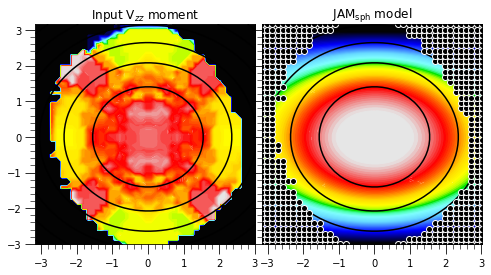

jam_axi_proj_sph_z (analytic_los=False) elapsed time sec: 1.67
inc=60.0; beta[0]=0.20; kappa=-2.25; M/L=1.00; BH=1.0e+08; chi2/DOF=465.
Total mass MGE (MSun): 9.351e+11
[-3.15747686 -3.01051607 -2.86355529 -2.7165945  -2.56963372 -2.42267293
 -2.27571215 -2.12875136 -1.98179058 -1.83482979 -1.68786901 -1.54090822
 -1.39394744 -1.24698665 -1.10002587 -0.95306508 -0.8061043  -0.65914352
 -0.51218273 -0.36522195 -0.21826116 -0.07130038  0.07566041  0.22262119
  0.36958198  0.51654276  0.66350355  0.81046433  0.95742512  1.1043859
  1.25134669  1.39830747  1.54526825  1.69222904  1.83918982  1.98615061
  2.13311139  2.28007218  2.42703296  2.57399375  2.72095453  2.86791532
  3.0148761  -3.15747686 -3.01051607 -2.86355529 -2.7165945  -2.56963372
 -2.42267293 -2.27571215 -2.12875136 -1.98179058 -1.83482979 -1.68786901
 -1.54090822 -1.39394744 -1.24698665 -1.10002587 -0.95306508 -0.8061043
 -0.65914352 -0.51218273 -0.36522195 -0.21826116 -0.07130038  0.07566041
  0.22262119  0.36958198  0.51

/local/shawnknabel/anaconda3/envs/astroconda/lib/python3.7/site-packages/plotbin/sauron_colormap.py:105: UserWarning: Trying to register the cmap 'sauron' which already exists.
  plt.register_cmap(cmap=sauron)
/local/shawnknabel/anaconda3/envs/astroconda/lib/python3.7/site-packages/plotbin/sauron_colormap.py:106: UserWarning: Trying to register the cmap 'sauron_r' which already exists.
  plt.register_cmap(cmap=sauron_r)


1849


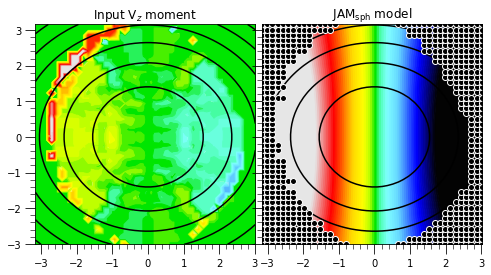

<Figure size 576x432 with 0 Axes>

In [8]:
"""
    Copyright (C) 2019-2021, Michele Cappellari

    E-mail: michele.cappellari_at_physics.ox.ac.uk

    Updated versions of the software are available from my web page
    http://purl.org/cappellari/software

CHANGELOG
---------

V1.1.0: MC, Oxford, 16 July 2020
    - Compute both Vrms and LOS velocity.
V1.0.1: MC, Oxford, 21 April 2020
    - Made a separate file
V1.0.0: Michele Cappellari, Oxford, 08 November 2019
    - Written and tested

"""
import numpy as np
import matplotlib.pyplot as plt

from jampy.jam_axi_proj import jam_axi_proj
from jampy.jam_axi_proj import rotate_points
from plotbin.plot_velfield import plot_velfield

##############################################################################

#np.random.seed(123)
#xbin, ybin = np.random.uniform(low=[-55, -40], high=[55, 40], size=[1000, 2]).T

'''
What do I do for inclination?
'''
inc = 60.                                                # Assumed galaxy inclination

#r = np.sqrt(xbin**2 + (ybin/np.cos(np.radians(inc)))**2) # Radius in the plane of the disk
#a = 40                                                   # Scale length in arcsec
#vr = 2000*np.sqrt(r)/(r + a)                             # Assumed velocity profile (v_c of Hernquist 1990)
#vel = vr * np.sin(np.radians(inc))*xbin/r                # Projected velocity field
#sig = 8700/(r + a)                                       # Assumed velocity dispersion profile
#rms = np.sqrt(vel**2 + sig**2)                           # Vrms field in km/s

# Until here I computed some fake input kinematics to fit with JAM.
# Ina real application, instead of the above lines one will read the
# measured stellar kinematics, e.g. from integral-field spectroscopy

'''
Open kinematics maps
'''
V = np.genfromtxt(file_dir + obj_name + '_V_2d.txt', delimiter=',')
dV = np.genfromtxt(file_dir + obj_name + '_dV_2d.txt', delimiter=',')
VD = np.genfromtxt(file_dir + obj_name + '_VD_2d.txt', delimiter=',')
dVD = np.genfromtxt(file_dir + obj_name + '_dVD_2d.txt', delimiter=',')
# compute rms velocity
Vrms = np.sqrt(V**2 + VD**2)
dVrms = np.sqrt((dV*V)**2 + (dVD*VD)**2)/Vrms

'''
x and y bins (pixels)
'''
# write the grid of xbins and ybins with (0,0) at the center and the x-axis corresponding to major axis
# set x and y bins so that center is (0, 0)
size = V.shape[0]

xbin_arcsec = np.linspace(-np.floor(size/2), np.floor(size/2), size) * scale
ybin_arcsec = np.linspace(-np.floor(size/2), np.floor(size/2), size) * scale

# set PA from mean photometry fitting
PA = np.radians(theta_mean)


# set new arrays with the rotated coordinates
xbin_rot = np.zeros(size)
ybin_rot = np.zeros(size)
    
# rotate the coordinates and save to array
for i in range(len(xbin_arcsec)):
    for j in range(len(ybin_arcsec)):
        x_new, y_new = rotate_points(xbin_arcsec[i], ybin_arcsec[j], PA)
        xbin_rot[i] = x_new
        ybin_rot[j] = y_new
        
xbin, ybin = np.meshgrid(xbin_rot, ybin_rot)

'''
flatten data and bins
'''
V = V.flatten()
dV = dV.flatten()
VD = VD.flatten()
dVD = dVD.flatten()
Vrms = Vrms.flatten()
dVrms = dVrms.flatten()
xbin = xbin.flatten()
ybin = ybin.flatten()
        
'''
surface density
'''
# take the surface density, etc from mge
surf = surf_dens_list[2] #np.array([39483., 37158., 30646., 17759., 5955.1, 1203.5, 174.36, 21.105, 2.3599, 0.25493])
sigma = sigma_list[2] #np.array([0.153, 0.515, 1.58, 4.22, 10, 22.4, 48.8, 105, 227, 525])
qObs = q_list[2] #np.full_like(sigma, 0.57)

from astropy.cosmology import Planck18 as cosmo  # Planck 2018
# redshift, convert to angular diameter dist in Mpc
z = 0.195
distance = cosmo.angular_diameter_distance(z).value
mbh = 1e8 # Black hole mass in solar masses
beta = np.full_like(surf, 0.2)

# Below I assume mass follows light, but in a real application one
# will generally include a dark halo in surf_pot, sigma_pot, qobs_pot.
# See e.g. Cappellari (2013) for an example
# https://ui.adsabs.harvard.edu/abs/2013MNRAS.432.1709C

surf_lum = surf_pot = surf
sigma_lum = sigma_pot = sigma
qobs_lum = qobs_pot = qObs
sigmapsf = 0.75
sigmapsf = np.atleast_1d(sigmapsf)
sigmaX2 = sigma_lum**2 + sigmapsf[:, None]**2
sigmaY2 = (sigma_lum*qobs_lum)**2 + sigmapsf[:, None]**2
#normpsf = [0.7, 0.3]
pixsize = scale #0.8
goodbins = np.isfinite(Vrms) # take finite data
#goodbins = r > 10  # Arbitrarily exclude the center to illustrate how to use goodbins

'''
run JAM
'''
# I use a loop below, just to higlight the fact that all parameters
# remain the same for the two JAM calls, except for 'moment' and 'data'
plt.figure(1)

for moment, data, errors in zip(['zz', 'z'], [Vrms, V], [dVrms, dV]):

    # The model is by design similar but not identical to the adopted kinematics!
    m = jam_axi_proj(surf_lum, sigma_lum, qobs_lum, surf_pot, sigma_pot, qobs_pot,
                     inc, mbh, distance, xbin, ybin, plot=True, data=data, errors=errors,
                     sigmapsf=sigmapsf, #normpsf=normpsf,
                     beta=beta, pixsize=pixsize,
                     moment=moment, goodbins=goodbins, 
                     align='sph', ml=None, nodots=True)
    plt.pause(3)
    plt.figure(2)
    surf_pot *= m.ml  # Scale the density by the best fitting M/L from the previous step
